# Property Price Prediction

In [609]:
!pip install --upgrade pip
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install xgboost
!pip install seaborn
!pip install scikit-learn


In [5]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)

# import warnings to surpress warnings
import warnings
warnings.filterwarnings ("ignore")


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# importing machine learning models
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## 1. Loading Datasets

In [7]:
dataset = pd.read_csv("data.csv")
print (f'\n Shape of the Dataset: {dataset.shape[0]} rows and {dataset.shape[1]} columns')
display (dataset)


 Shape of the Dataset: 1460 rows and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [705]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [706]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


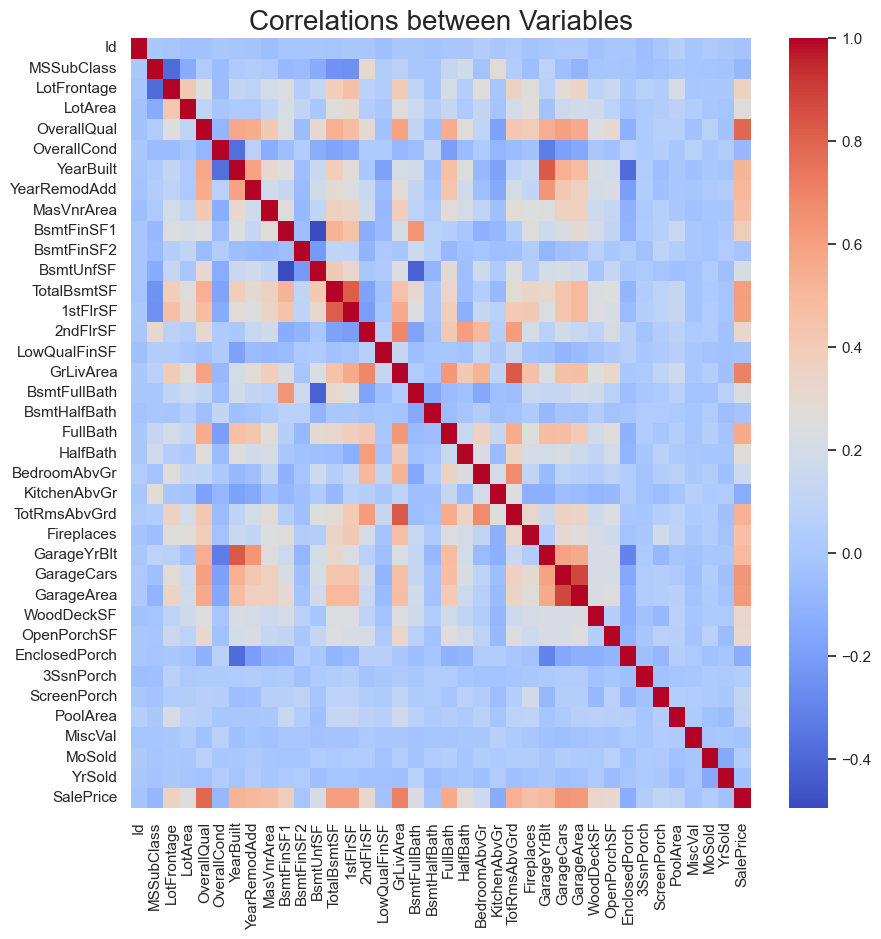

In [8]:

# Visualize the correlations between variables with Seaborn
correlation = dataset.corr(numeric_only=True)
plt.figure (figsize = (10,10))
sns.heatmap (correlation, cmap = "coolwarm")
plt.title ("Correlations between Variables", size = 20)
plt.show()

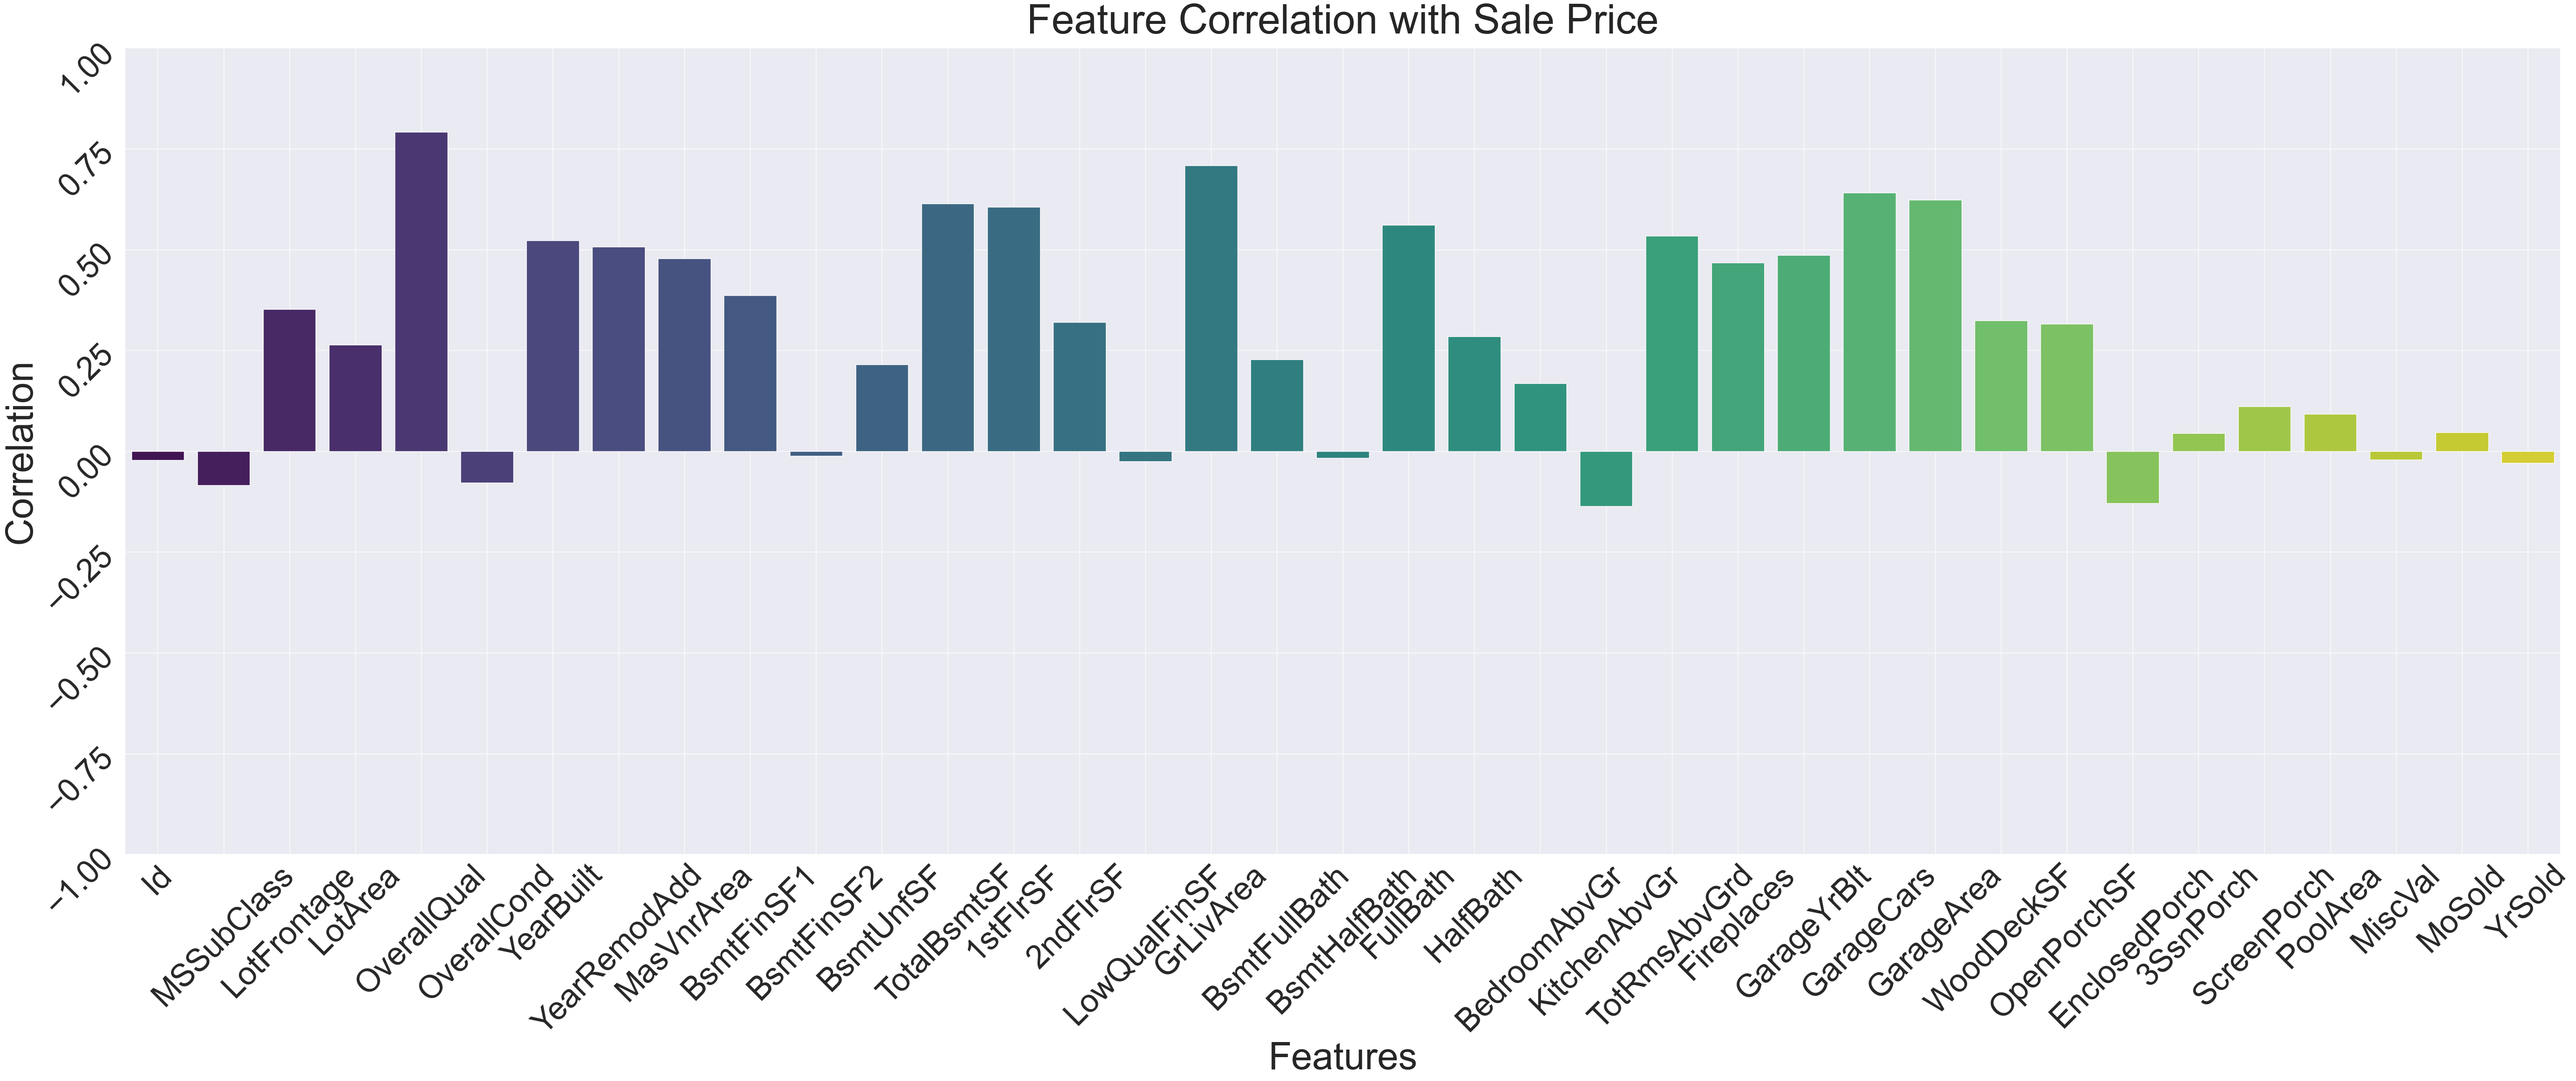

In [820]:
# Visualize the correlation of each variable to sale price

# Create a bar plot
corr_sp = dataset.corr(numeric_only= True)['SalePrice'].drop('SalePrice')
plt.figure(figsize=(75, 25))
sns.barplot(x=corr_sp.index, y=corr_sp.values, palette="viridis")
plt.title('Feature Correlation with Sale Price', size = 70)
plt.grid (True)
plt.xlabel('Features', size = 65)
plt.ylabel('Correlation', size = 65)
plt.xticks(rotation=45, fontsize=55)
plt.yticks(rotation=45, fontsize=55)
plt.ylim(-1, 1)
plt.show()

## 2. Feature Selections

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.

In [9]:
# Important numerical featues which correlation is >0.5 and <- 0.5 based on Pearson Correlation

num_features = list(correlation["SalePrice"] [(correlation["SalePrice"]>0.5) 
                          | (correlation["SalePrice"]<-0.5)].index)

#Choosing categorical features ( data type : object) 
cat_features = ["MSZoning", "Utilities", "Neighborhood", "BldgType", "HouseStyle", "Heating", "Electrical", "SaleType"]

#All important features, numerical and categorical
important_features = num_features + cat_features

dataset = dataset[important_features]
dataset


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,Neighborhood,BldgType,HouseStyle,Heating,Electrical,SaleType
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,CollgCr,1Fam,2Story,GasA,SBrkr,WD
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,Veenker,1Fam,1Story,GasA,SBrkr,WD
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,CollgCr,1Fam,2Story,GasA,SBrkr,WD
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,Crawfor,1Fam,2Story,GasA,SBrkr,WD
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,NoRidge,1Fam,2Story,GasA,SBrkr,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,Gilbert,1Fam,2Story,GasA,SBrkr,WD
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,NWAmes,1Fam,1Story,GasA,SBrkr,WD
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,Crawfor,1Fam,2Story,GasA,SBrkr,WD
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,NAmes,1Fam,1Story,GasA,FuseA,WD


In [10]:
# Checking for the missing values in the dataframe

print ("Missing Values by features")
print ("-"*26)
print (dataset.isna().sum())
print ("-"*26)
print ("Total Missing Values:" , dataset.isna().sum().sum())

Missing Values by features
--------------------------
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
MSZoning        0
Utilities       0
Neighborhood    0
BldgType        0
HouseStyle      0
Heating         0
Electrical      0
SaleType        0
dtype: int64
--------------------------
Total Missing Values: 0


### Data Visualization

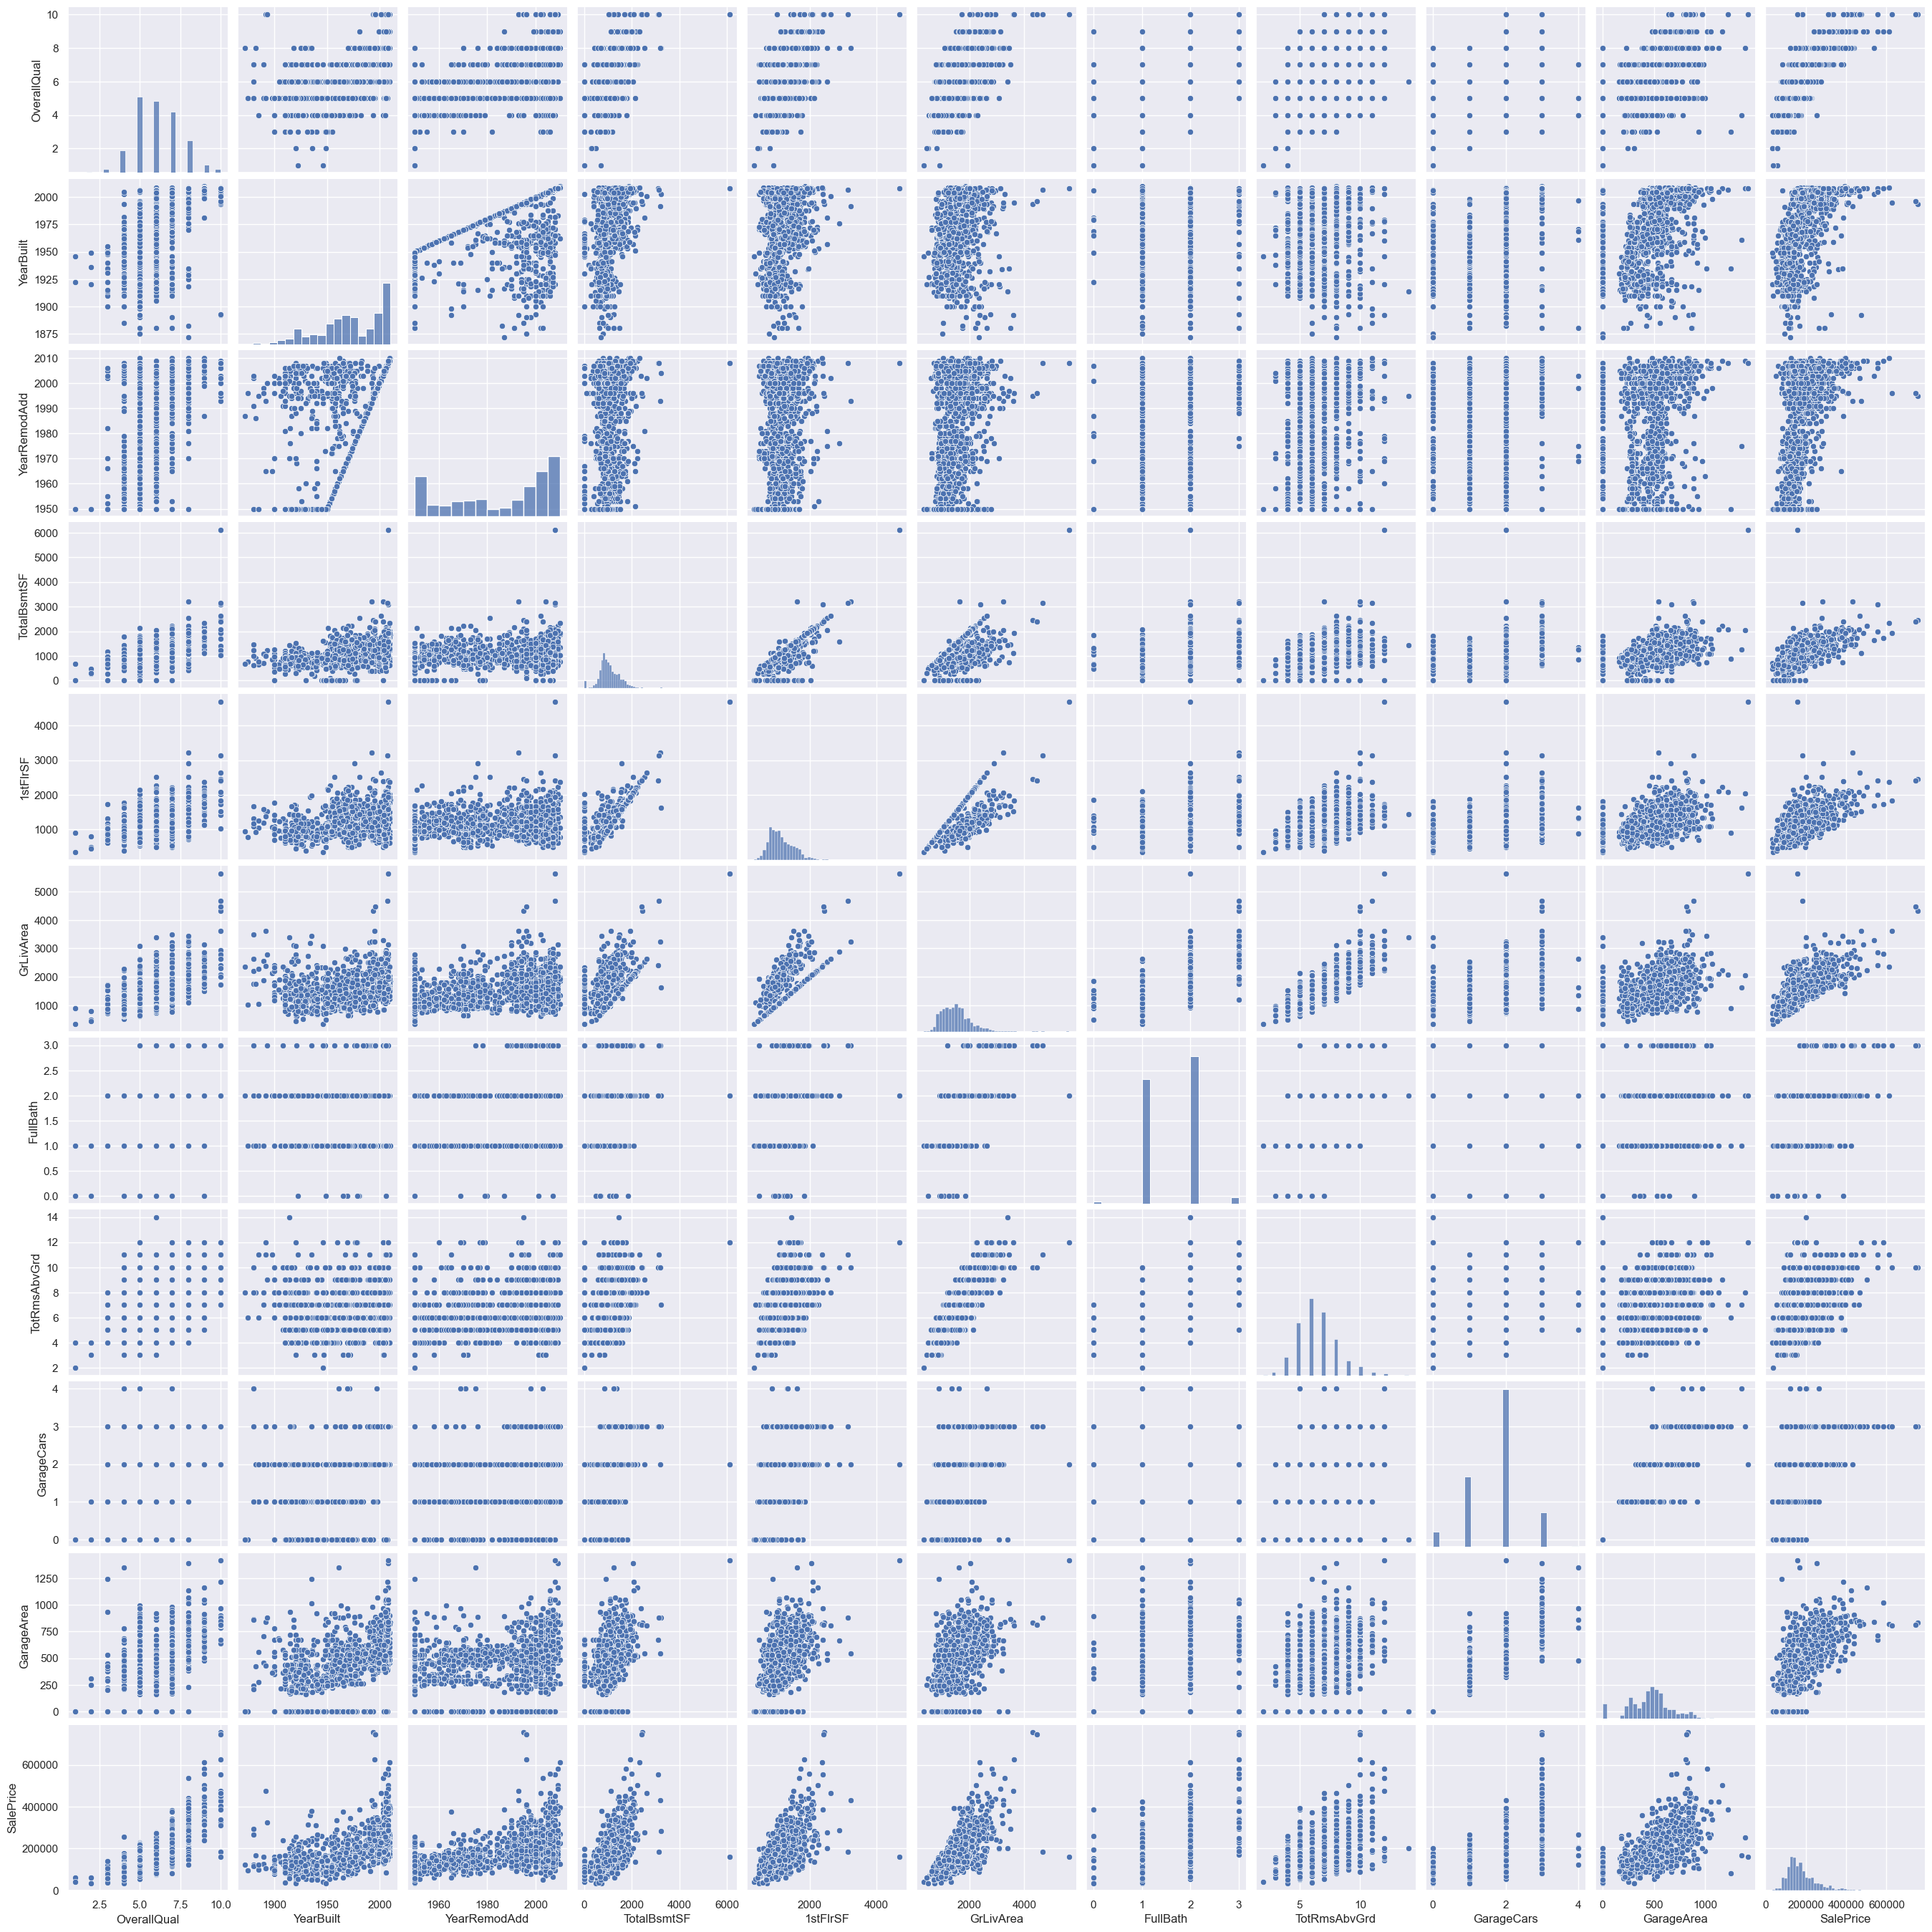

In [798]:
# visualization of the correlation between important features
sns.pairplot (dataset[important_features])

In [11]:
# Splitting dataset (X and y)
X_data = dataset.drop ("SalePrice", axis = 1)
y_data = dataset["SalePrice"]

In [12]:
# Converting categorical features to numerical using One-Hot Encoding
X_encoded = pd.get_dummies(X_data, columns = cat_features, dtype = 'uint8')
print (f'\n Shape of the Dataset: {X_encoded.shape[0]} rows and {X_encoded.shape[1]} columns')
display (X_encoded)


 Shape of the Dataset: 1460 rows and 75 columns


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,2003,2003,856,856,1710,2,8,2,548,...,1,0,0,0,0,0,0,0,0,1
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,0,0,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,...,1,0,0,0,0,0,0,0,0,1
3,7,1915,1970,756,961,1717,1,7,3,642,...,1,0,0,0,0,0,0,0,0,1
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,0,0,0,0,1
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,0,0,0,0,1
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,1,0,0,0,0,0,0,0,0,1
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,0,0,0,0,1


In [13]:
num_features.remove("SalePrice")

In [14]:
scaler = StandardScaler()

In [15]:
X_encoded [num_features] = scaler.fit_transform(X_encoded[num_features])
X_encoded

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Electrical_SBrkr,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,1,0,0,0,0,0,0,0,0,1
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,0,0,0,0,1
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,1,0,0,0,0,0,0,0,0,1
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,1,0,0,0,0,0,0,0,0,1
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.238122,-0.542435,0.250402,0.789741,0.296763,0.311725,-0.060731,...,1,0,0,0,0,0,0,0,0,1
1456,-0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420,...,1,0,0,0,0,0,0,0,0,1
1457,0.651479,-1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,-1.026858,-1.033914,...,1,0,0,0,0,0,0,0,0,1
1458,-0.795151,-0.704406,0.539493,0.046905,-0.218982,-0.832788,-1.026041,-0.934130,-1.026858,-1.090059,...,0,0,0,0,0,0,0,0,0,1


## Splitting Dataset to Train and Test Data

In [16]:
# Splitting the dataset to 80:20 ratio of train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_data, random_state = 42, 
                                                    test_size = 0.2)

# Defining Evaluation Metrics

In [17]:
#def rmse_cv(model): 
    #'''Calculating the RMSE Cross-Validation score of machine learning model'''
   # rmse = np.sqrt(-cross_val_score(model, X_encoded, y_data, scoring="neg_mean_squared_error", cv=5)).mean()
    #return rmse
    

def evaluation(y_data, predictions):
    '''Calculating the evaluation metrics: rmse, r_squared, mae,mse'''
    rmse = np.sqrt(mean_squared_error(y_data, predictions))
    r_squared = r2_score(y_data, predictions)
    mae = mean_absolute_error(y_data, predictions)
    mse = mean_squared_error(y_data, predictions)
    return rmse, r_squared, mae, mse

# Machine Learning Models

In [18]:
models = pd.DataFrame (columns =['Model', 'MSE', 'RMSE', 'R_Squared', 'MAE'])

## 1. Support Vector Regression

In [22]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
rmse, r_squared, mae, mse = evaluation(y_test, predictions)

print("RMSE:", rmse)
print("R_Squared:", r_squared)
print("MAE:", mae)
print("MSE:", mse)
#print("-"*45)
#rmse_cross_val = rmse_cv(svr)
#print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR", "MSE": mse, "RMSE": rmse, "R_Squared": r_squared, "MAE": mae}
models = models._append(new_row, ignore_index=True)

RMSE: 88596.45214581864
R_Squared: -0.023337354996906923
MAE: 59471.13320983278
MSE: 7849331332.826331



## 2. Random Forest Regressor


In [873]:
random_forest = RandomForestRegressor(n_estimators= 100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
rmse, r_squared, mae, mse = evaluation(y_test, predictions)

print ("RMSE:", rmse)
print ("R_squared:", r_squared)
print ("MAE:", mae)
print ("MSE:", mse)
#print ("-"*45)
#rmse_cross_val = rmse_cv (random_forest)
#print ("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Random Forest", "MSE": mse, "RMSE": rmse, "R_Squared": r_squared, "MAE": mae}
models = models._append(new_row, ignore_index = True)

RMSE: 27794.0257338037
R_squared: 0.8992861782374393
MAE: 17704.874653457275
MSE: 772507866.4913423
---------------------------------------------


In [855]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice':rf_predictions})
output.to_csv('prediction.csv', index=False)
output.head()

,Id,SalePrice
0,892,142873.25
1,1105,321277.37
2,413,108420.75
3,522,162330.00
4,1036,320540.27


## 3. XGBoost Regressor

In [874]:
xgb = XGBRegressor (n_estimators =1000, learning_rate = 0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict (X_test)
rmse, r_squared, mae, mse = evaluation (y_test, predictions)

print ("RMSE:", rmse)
print ("R_Squared:", r_squared)
print ("MAE:", mae)
print ("MSE:", mse)
print ("-"*45)
#rmse_cross_val = rmse_cv (xgb)
#print ("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBoost Regressor", "MSE": mse, "RMSE": rmse, "R_Squared": r_squared, "MAE": mae}
models = models._append(new_row, ignore_index = True)

RMSE: 27037.373419873787
R_Squared: 0.9046951144319352
MAE: 17262.89408979024
MSE: 731019561.4456975
---------------------------------------------


## Model Comparison

In [875]:
models.sort_values(by = "RMSE")

,Model,MSE,RMSE,R_Squared,MAE
2,XGBoost Regressor,7.310196e+08,27037.373420,0.904695,17262.894090
1,Random Forest,7.725079e+08,27794.025734,0.899286,17704.874653
0,SVR,1.052841e+09,32447.508958,0.862738,18253.143307


# Making Predictions

,Id,SalePrice
0,892,143381.75
1,1105,318684.42
2,413,112243.33
3,522,165440.50
4,1036,316975.01
